In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/ranjitsah/Downloads/TensorFlow_FILES/DATA/cancer_classification.csv')

In [3]:
df.shape

(569, 31)

In [4]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

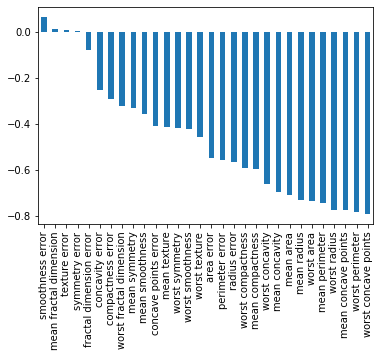

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values(ascending=False).plot(kind='bar')

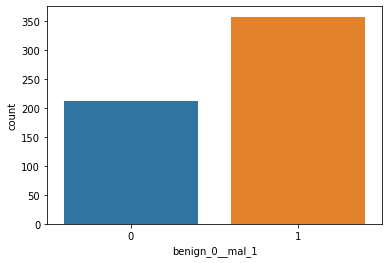

In [8]:
sns.countplot(df['benign_0__mal_1'])

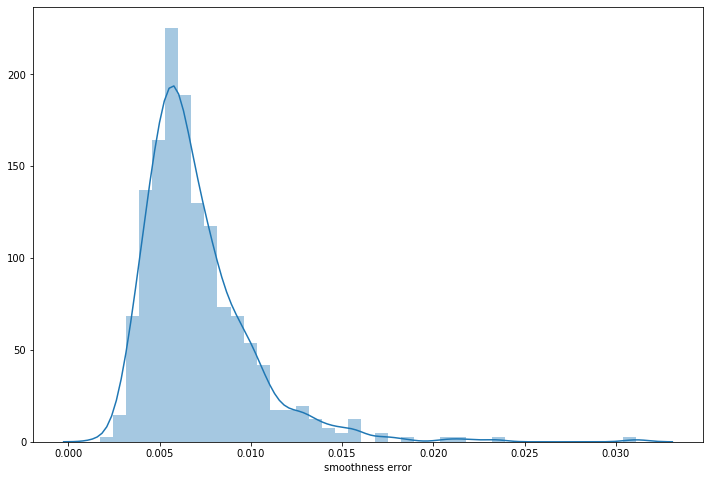

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(df['smoothness error'])

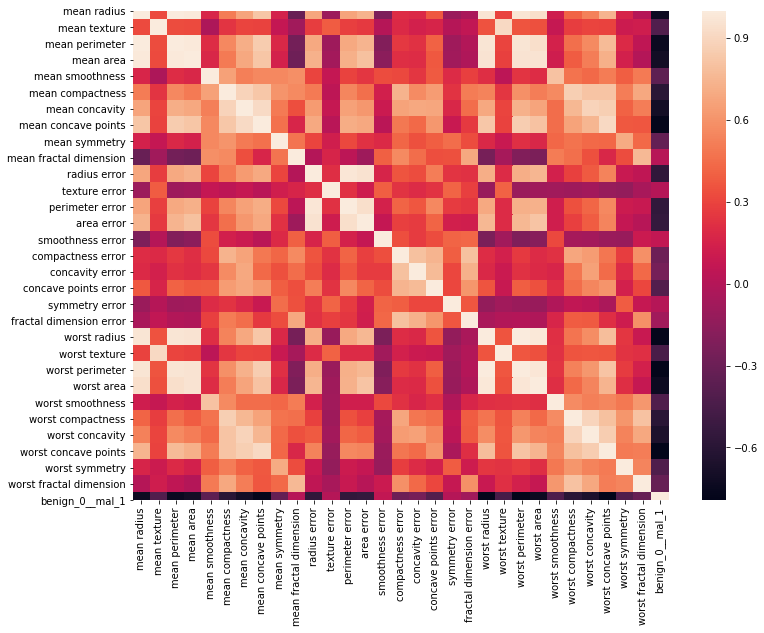

In [10]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr())

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [14]:
y_train.shape

(398,)

In [15]:
y_test.shape

(171,)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense

In [20]:
X_train.shape

(398, 30)

In [21]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [22]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 0s 15ms/step - loss: 0.6832 - val_loss: 0.6582
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6378 - val_loss: 0.6129
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5884 - val_loss: 0.5613
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5347 - val_loss: 0.5101
Epoch 5/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4822 - val_loss: 0.4585
Epoch 6/600
13/13 [==============================] - 0s 8ms/step - loss: 0.4287 - val_loss: 0.4087
Epoch 7/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3805 - val_loss: 0.3627
Epoch 8/600
13/13 [==============================] - 0s 6ms/step - loss: 0.3345 - val_loss: 0.3250
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2977 - val_loss: 0.2921
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.2646 - val_loss: 0.2632
Epoch 11

In [23]:
losse = pd.DataFrame(model.history.history)

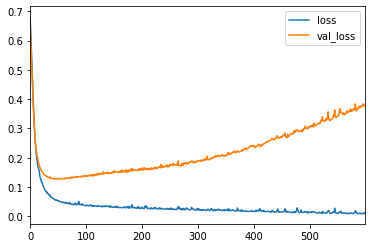

In [24]:
losse.plot()

In [25]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss',mode='min', verbose=1,patience=3)

In [38]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/67
13/13 [==============================] - 0s 7ms/step - loss: 0.0495 - val_loss: 0.1301
Epoch 2/67
13/13 [==============================] - 0s 6ms/step - loss: 0.0490 - val_loss: 0.1301
Epoch 3/67
13/13 [==============================] - 0s 6ms/step - loss: 0.0483 - val_loss: 0.1305
Epoch 4/67
13/13 [==============================] - 0s 5ms/step - loss: 0.0481 - val_loss: 0.1303
Epoch 5/67
13/13 [==============================] - 0s 5ms/step - loss: 0.0494 - val_loss: 0.1311
Epoch 6/67
13/13 [==============================] - 0s 5ms/step - loss: 0.0484 - val_loss: 0.1311
Epoch 7/67
13/13 [==============================] - 0s 5ms/step - loss: 0.0474 - val_loss: 0.1328
Epoch 8/67
13/13 [==============================] - 0s 5ms/step - loss: 0.0459 - val_loss: 0.1323
Epoch 9/67
13/13 [==============================] - 0s 5ms/step - loss: 0.0459 - val_loss: 0.1314
Epoch 10/67
13/13 [==============================] - 0s 5ms/step - loss: 0.0477 - val_loss: 0.1322
Epoch 11/67
13/13 [

In [117]:
model_loss = pd.DataFrame(model.history.history)

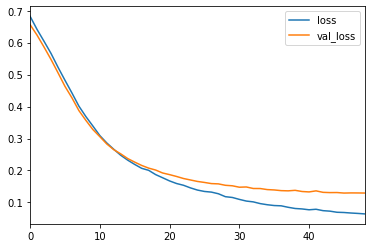

In [118]:
model_loss.plot()

In [119]:
from tensorflow.keras.layers import Dropout

In [120]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#Binary classification
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [121]:
model.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6919 - val_loss: 0.6758
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6741 - val_loss: 0.6609
Epoch 3/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6519 - val_loss: 0.6419
Epoch 4/600
13/13 [==============================] - 0s 6ms/step - loss: 0.6413 - val_loss: 0.6208
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.5985
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5867 - val_loss: 0.5749
Epoch 7/600
13/13 [==============================] - 0s 6ms/step - loss: 0.5824 - val_loss: 0.5509
Epoch 8/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5720 - val_loss: 0.5249
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5373 - val_loss: 0.5014
Epoch 10/600
13/13 [==============================] - 0s 7ms/step - loss: 0.5341 - val_loss: 0.4746
Epoch 11

In [39]:
model_loss = pd.DataFrame(model.history.history)

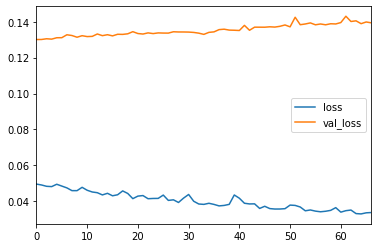

In [40]:
model_loss.plot()

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
prediction=model.predict_classes(X_test)


In [43]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [44]:
print(confusion_matrix(y_test,prediction))

[[ 63   3]
 [  2 103]]


In [35]:
from tensorflow.keras.models import load_model

In [36]:
model.save('cancer_model.h5')

In [37]:
later_model = load_model('cancer_model.h5')